## [Master en Data Science (UC-UIMP)] Introduction to R
### Practise: Building a weather generator
### Using R or Python (or both). Indicative examples provided in R

#### Introduction

Weather generators are computational models which generate (daily) synthetic series of random values simulating the distribution of a particular meteorological variable. Precipitation is the most popular example due to its mixed character: discrete (ocurrence: dry or wet) and continuous (rain amount for wet days). The discrete part is typically characterized by the frequency of wet/dry days (say, e.g. 0.53/0.47 in Santander), whereas the continuous is typically characterized by an exponential distribution defined by a rate parameter (you don't need to understand statistics for this practise! it is only about programming).

In this practice we will use the main control structures (conditionals and loops) and apply them to build a simple weather generator and create artificial precipitation amount series. To this aim we will use some functions which simulate (pseudo)random numbers from different families of distributions (uniform and exponential), which is a key task for several computational statistics problems (you will learn a lot more about this in the stastistics course).

## How does a precipitation time series look like?

In order to work with real data, we will use to files with daily information for two weather stations: Santander CMT (RR_STAID003922.txt) and Santander/Parayas (RR_STAID003923.txt). The former is located in the Santander regional center (close to el Faro de Cabo Mayor) and the latter is located in Santander airpot. Open one of the files with a text editor and see the structure: it has some lines with information (to be skipped) and then a header followed by number in columns (STAID: the code of the station; SOUI: the international code of the station; DATA: the day; RR: precipitation value; Q_RR: a quality control flat, 0: OK; 9: missing data).

In [2]:
library(tidyverse)

STAID SOUID DATE     RR  Q_RR
10837 3922  19981 19530901   0 0   
10838 3922  19981 19530902  17 0   
10839 3922  19981 19530903   0 0   
10840 3922  19981 19530904   0 0   
10841 3922  19981 19530905   0 0   
10842 3922  19981 19530906   0 0   
10843 3922  19981 19530907   0 0   
10844 3922  19981 19530908   4 0   
10845 3922  19981 19530909   0 0   
10846 3922  19981 19530910  31 0   
10847 3922  19981 19530911   0 0   
10848 3922  19981 19530912   0 0   
10849 3922  19981 19530913   0 0   
10850 3922  19981 19530914 221 0   
10851 3922  19981 19530915  82 0   
10852 3922  19981 19530916   0 0   
10853 3922  19981 19530917  10 0   
10854 3922  19981 19530918 333 0   
10855 3922  19981 19530919  32 0   
10856 3922  19981 19530920  17 0   
10857 3922  19981 19530921  27 0   
10858 3922  19981 19530922   0 0   
10859 3922  19981 19530923  67 0   
10860 3922  19981 19530924   0 0   
10861 3922  19981 19530925 210 0   
10862 3922  19981 19530926  83 0   
10863 3922  19981 19530927 115 0   
10864 3922  19981 19530928  25 0   
10865 3922  19981 19530929   0 0   
10866 3922  19981 19530930   0 0   
⋮     ⋮     ⋮     ⋮        ⋮   ⋮   
34244 3922  19981 20171002 23  0   
34245 3922  19981 20171003  0  0   
34246 3922  19981 20171004  0  0   
34247 3922  19981 20171005  0  0   
34248 3922  19981 20171006 14  0   
34249 3922  19981 20171007  0  0   
34250 3922  19981 20171008  0  0   
34251 3922  19981 20171009  0  0   
34252 3922  19981 20171010  0  0   
34253 3922  19981 20171011  0  0   
34254 3922  19981 20171012  0  0   
34255 3922  19981 20171013  0  0   
34256 3922  19981 20171014  0  0   
34257 3922  19981 20171015  0  0   
34258 3922  19981 20171016  0  0   
34259 3922  19981 20171017  0  0   
34260 3922  19981 20171018 40  0   
34261 3922  19981 20171019 36  0   
34262 3922  19981 20171020  8  0   
34263 3922  19981 20171021  6  0   
34264 3922  19981 20171022 10  0   
34265 3922  19981 20171023  0  0   
34266 3922  19981 20171024  0  0   
34267 3922  19981 20171025  0  0   
34268 3922  19981 20171026  0  0   
34269 3922  19981 20171027  0  0   
34270 3922  19981 20171028  0  0   
34271 3922  19981 20171029 21  0   
34272 3922  19981 20171030 17  0   
34273 3922  19981 20171031  0  0

[1] 23437

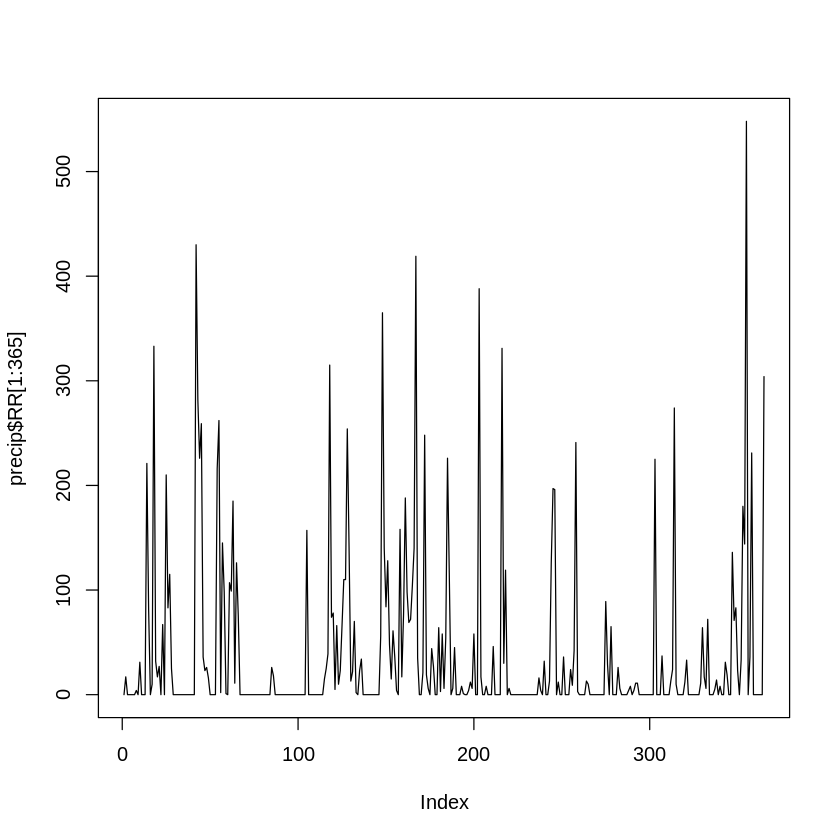

In [3]:
# Loading and ploting data for Santander CMT
precip <- read.csv("RR_STAID003922.txt",skip = 20, header = T)
precip <- subset(precip, precip$DATE >= 19530901)
precip
length(precip$DATE) #23437
plot(precip$RR[1:365], type="l")    # first year

Now try to load the data for Parayas (in this case the series contains missing data characterized by -9999, you will see this when plotting). In both cases, the units of the data is "10*mm". You need to divide both series by 10 in order to get "mm" (litros por metro cuadrado). 

[1] 23437

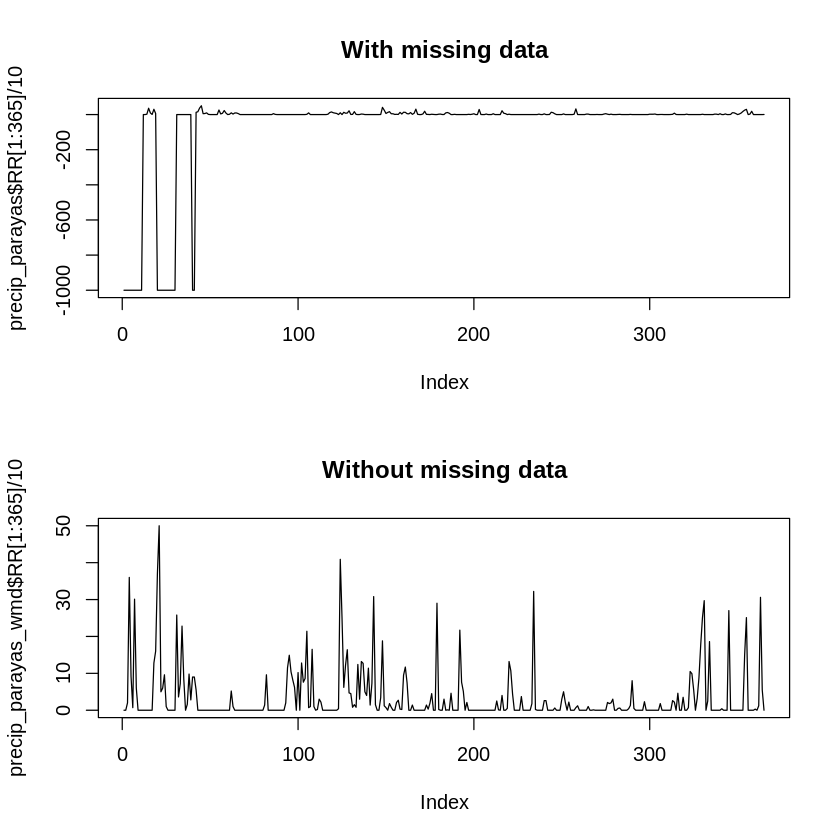

In [4]:
# Load the series for Parayas and remove missing data.
# Both series should be very similar. Compare them using e.g. 
# a scatter plot (points displayed along the diagonal if equal).
par(mfrow=c(2,1))
# you code here ...
precip_parayas <- read.csv("RR_STAID003923.txt", skip = 20, header = T)
length(precip_parayas$RR) #23437
plot(precip_parayas$RR[1:365]/10, type="l", main='With missing data')    # first year

#Subset with no missing data (-9999)
precip_parayas_wmd <- subset(precip_parayas, precip_parayas$RR != -9999)
plot(precip_parayas_wmd$RR[1:365]/10, type="l", main='Without missing data')    # first year


Warning message:
“Removed 832 rows containing missing values (geom_point).”

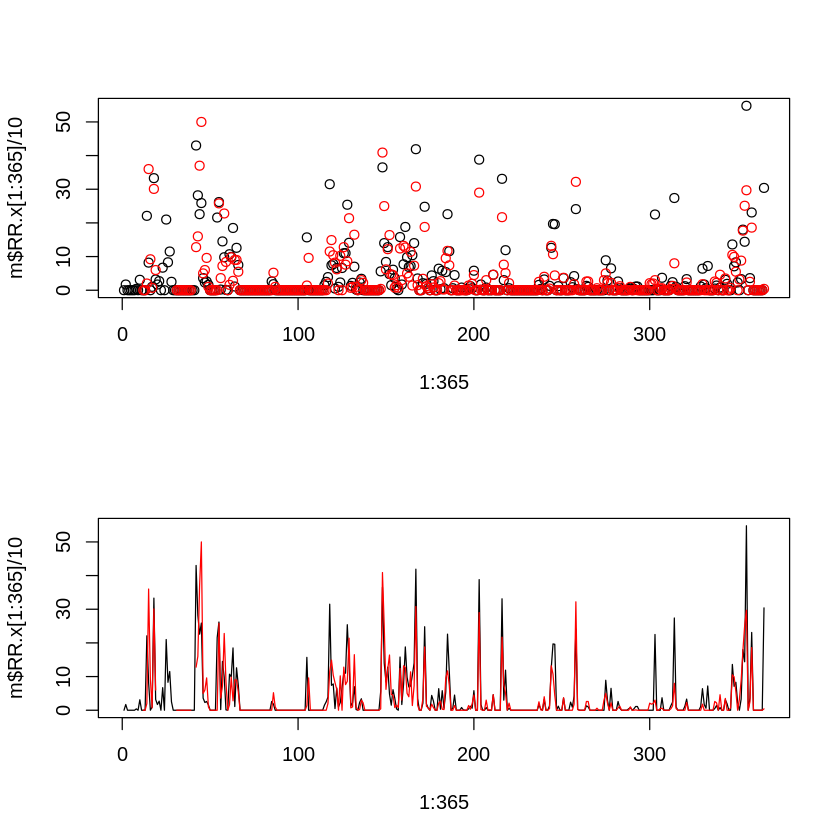

12          13          14          15          16          17 
  0,3926632   0,3926632   1,9939928  29,2165950   7,7587791   0,9531286 
         18          19          31          32          33          34 
 24,4926729   5,1966519   0,3926632   0,3926632   0,3926632   0,3926632 
         35          36          37          38          39          42 
  0,3926632   0,3926632   0,3926632   0,3926632   0,3926632  10,6411723 
         43          44          45          46          47          48 
 13,2032996  30,0172598  40,4259018   4,3959871   5,1966519   8,0790450 
         49          50          51          52          53          54 
  1,1933280   0,3926632   0,3926632   0,3926632   0,3926632   0,3926632 
         55          56          57          58          59          60 
 21,0498143   3,2750564   6,1574496  18,6478200   7,1182473   0,3926632 
         61          62          63          64          65          66 
  1,6737269   8,2391780   2,6345246   7,5986462   7,5986462   4,7963195 
         67          68          69          70          71          72 
  0,3926632   0,3926632   0,3926632   0,3926632   0,3926632   0,3926632 
         73          74          75          76          77          78 
  0,3926632   0,3926632   0,3926632   0,3926632   0,3926632   0,3926632 
         79          80          81          82          83          84 
  0,3926632   0,3926632   0,3926632   0,3926632   0,3926632   0,3926632 
         85          86          87          88          89          90 
  0,3926632   4,5561201   1,1933280   0,3926632   0,3926632   0,3926632 
         91          92          93          94          95          96 
  0,3926632   0,3926632   0,3926632   0,3926632   0,3926632   0,3926632 
         97          98          99         100         101         102 
  0,3926632   0,3926632   0,3926632   0,3926632   0,3926632   0,3926632 
        103         104         105         106         107         108 
  0,3926632   0,3926632   1,5135939   8,0790450   0,3926632   0,3926632 
        109         110         111         112         113         114 
  0,3926632   0,3926632   0,3926632   0,3926632   0,3926632   0,3926632 
        115         116         117         118         119         120 
  0,3926632   0,3926632   1,9939928   9,6003081  12,3225683   8,7195769 
        121         122         123         124         125         126 
  6,9581144   5,3567848   0,3926632   8,5594439   0,3926632  10,6411723 
        127         128         129         130         131         132 
  6,4777155   7,2783803  17,5268894   0,9531286   1,1933280  13,6036320 
        133         134         135         136         137         138 
  1,1933280   0,3926632   0,5527962   2,7946576   2,1541257   0,3926632 
        139         140         141         142         143         144 
  0,3926632   0,3926632   0,3926632   0,3926632   0,3926632   0,3926632 
        145         146         147         148         149         150 
  0,3926632   0,3926632   0,7129292  33,1398524  20,4092825   5,3567848 
        151         152         153         154         155         156 
 10,1607735  13,5235655   4,1557877   3,9956547   1,0331951   1,5936604 
        157         158         159         160         161         162 
  1,0331951  10,3209064   2,7946576  10,9614382  10,5611058   4,3959871 
        163         164         165         166         167         168 
  3,5953223   9,5202416   1,5135939   6,2375161  25,0531382   1,5936604 
        169         170         171         172         173         174 
  0,3926632   0,3926632   3,1149235  15,4451609   1,3534610   0,9531286 
        175         176         177         178         179         180 
  0,3926632   1,8338598   1,0331951   0,3926632   0,3926632   2,0740593 
        181         182         183         184         185         186 
  2,5544581   0,6328627   0,5527962   7,9989786   9,7604411   6,3175826 
        187         188         189         190         191        

In [ ]:
par(mfrow=c(2,1))
#Scatter plot of both series
precip_parayas[precip_parayas == -9999] <- NA
m = merge(precip, precip_parayas, by="DATE")
# ggplot(data=m)+geom_point(mapping=aes(x=1:23437, y=m$RR.x/10))
plot(1:365,m$RR.x[1:365]/10)
points(1:365,m$RR.y[1:365]/10, col='red')

plot(1:365,m$RR.x[1:365]/10, type='l')
lines(1:365,m$RR.y[1:365]/10, col='red')

ggplot(data=m)+geom_point(mapping=aes(x=m$RR.x/10,y=m$RR.y/10))
m_sant <- m$RR.x/10
m_para <- m$RR.y/10
fit <- lm(m_sant~m_para, data=m)
fitted(fit)
# plot(precip$RR[1:20000]/10, precip_parayas$RR[1:20000]/10, main = "Precipitaciones Santander/Parayas",
#       col = c('red', 'blue') , xlab='Precipitaciones Santander', ylab='Precipitaciones Parayas')
# legend(80, 120, legend=c("Rojos: Santander", "Azules: Parayas"),
#        col=c("red", "blue"), lty=3:4, cex=0.8)

In [60]:
# Compute basic statistics for both series:
# Frequency of wet days (this is the probability of rain)
# Santander
factor_precip = factor(precip$RR)
precip_table = table(precip$RR)
precip_table = as.data.frame(precip_table)
precip_table
# Transition probabilities (from dry to dry and from dry to wet)
# you may need to create a loop and using a conditional for this

# your code here ...

Var1 Freq 
1   0    18344
2   1      454
3   2      676
4   3      563
5   4      447
6   5      432
7   6      353
8   7      304
9   8      271
10  9      231
11  10     317
12  11     191
13  12     258
14  13     210
15  14     201
16  15     198
17  16     197
18  17     208
19  18     193
20  19     142
21  20     230
22  21     127
23  22     164
24  23     146
25  24     148
26  25     143
27  26     154
28  27     168
29  28     111
30  29     110
⋮   ⋮    ⋮    
524 682  1    
525 684  1    
526 711  1    
527 713  1    
528 720  1    
529 727  1    
530 731  1    
531 735  1    
532 738  1    
533 743  1    
534 750  1    
535 755  1    
536 758  1    
537 773  1    
538 783  1    
539 815  1    
540 824  1    
541 826  1    
542 832  1    
543 850  1    
544 856  1    
545 863  1    
546 866  1    
547 883  1    
548 914  1    
549 920  1    
550 999  1    
551 1074 1    
552 1219 1    
553 1262 1

## Generating precipitation occurrence (0/1 series)

We first consider the case of precipitation occurrence (o for dry days and 1 for wet days).  

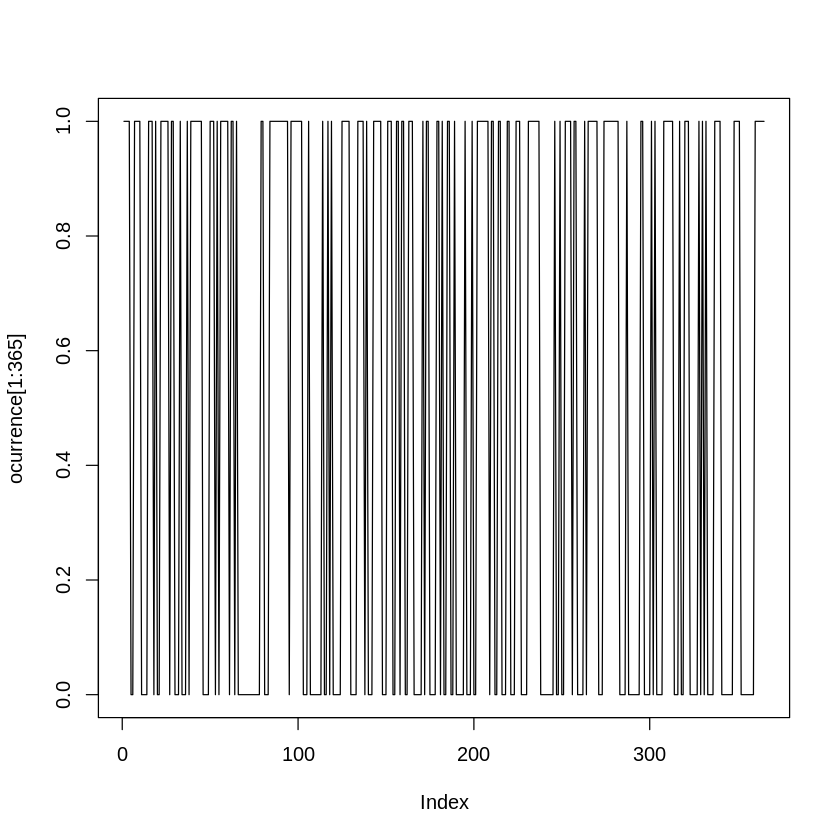

In [31]:
precip <- r1$RR / 10;
ocurrence <- as.integer(precip > 0);
plot(ocurrence[1:365], type="l")     # the first year

In order to generate a synthetic precipitation series for Santander we can use the function `runif` which generates random uniform numbers (between 0 and 1, which can be viewed as probabilities). Then, random numbers above the rain frequency for Santander can be coverted to one and numbers below to zero. 

In [26]:
? runif

# Obtain a series of 365 uniform numbers (between 0 and 1). 
# Use the frequency tresholds for Santander to convert to 0 or 1 values

# insert your code here

The series does not resemble the real one very much, since real precipitation is autocorrelated (sequences of zeros/ones), whereas the random numbers are not. Therefore, modify the code using the transition probabilities to generate rain ocurrence considering the transition probabilities. You may need to use a loop for this, computing ocurrence[i+1] based on the value of ocurrence[i].

In [29]:
# define a function with arguments for the transition probabilities
# and the number of simulated days and output the simulated series
# insert your code here

# plot the result (for a year)

Could you think of a more efficient way of implementing the above function?. Thy to avoid the use of loops by means of vectorized operations.

In [ ]:
# vectorized implementation
# insert your code here

## Simulating precipitation amount

The precipitation amount for the wet days (occurrence > 0) can be simulated using an exponential distribution. We need to fit a theoretical distribution to the observed in order to obtain the `rate` parameter. As an alternative, you can used instead the mean of the wet days precipitation amount (mean of precip values > 0). Then, we can use the `rexp` function to simulate random values with the obtained rate. 

and the precipitation amount for the wet days (occuDry == 0). To this aim, we need to fit a theoretical distribution to the observed data for each station. The two distributions most commonly used to simulate precipitation are the [Gamma](http://en.wikipedia.org/wiki/Gamma_distribution) and [Exponential](http://en.wikipedia.org/wiki/Exponential_distribution) distributions. We should load the library `MASS` and use the `fitdistr` function.

In [32]:
# Option 1: use the library MASS and use the fitdistr function.
library(MASS)   # you may need to install this package
? fitdistr      # use fitdistr to fit an exponential and obtain the rate.
# Option 2: estimate the rate as the mean of precip (for days with precip>0 only)
# Use only option 2 if running into trouble with option 1.

# Using the obtained rate, simulate 365 amount values and obtain the
# precipitation series multiplying the simulated occurrence and amount.
# 
# insert your code here
# 

ERROR: Error in library(MASS): there is no package called ‘MASS’


Now, we can gather all previous work on a single function to do the job.

In [ ]:
# define a function implementing the whole process and use it 
# to obtain series for Santander. 

# insert your code here